In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os

from pathlib import Path

import matplotlib.pyplot as plt
import motorlab as ml
import numpy as np

In [3]:
os.chdir(Path().resolve().parent)

In [4]:
sessions = ml.config.gbyk_sessions[:1]

In [104]:
poses = dict()

for session in sessions:
    POSES_DIR = Path("data/gbyk/") / session / "poses"
    poses_ = ml.data.load_from_memmap(POSES_DIR)
    poses_ = ml.poses.change_representation(poses_, "egocentric", "gbyk")
    poses[session] = poses_

In [106]:
intervals = ml.utils.get_intervals(
    data_dir="data/gbyk",
    sessions=sessions,
    experiment="gbyk",
    # include_homing=True,
)

### joint angles
- 0: ("l_hip", "l_knee", "l_ankle")
- 1: ("r_hip", "r_knee", "r_ankle")
- 2: ("l_shoulder", "l_elbow", "l_wrist")
- 3: ("r_shoulder", "r_elbow", "r_wrist")

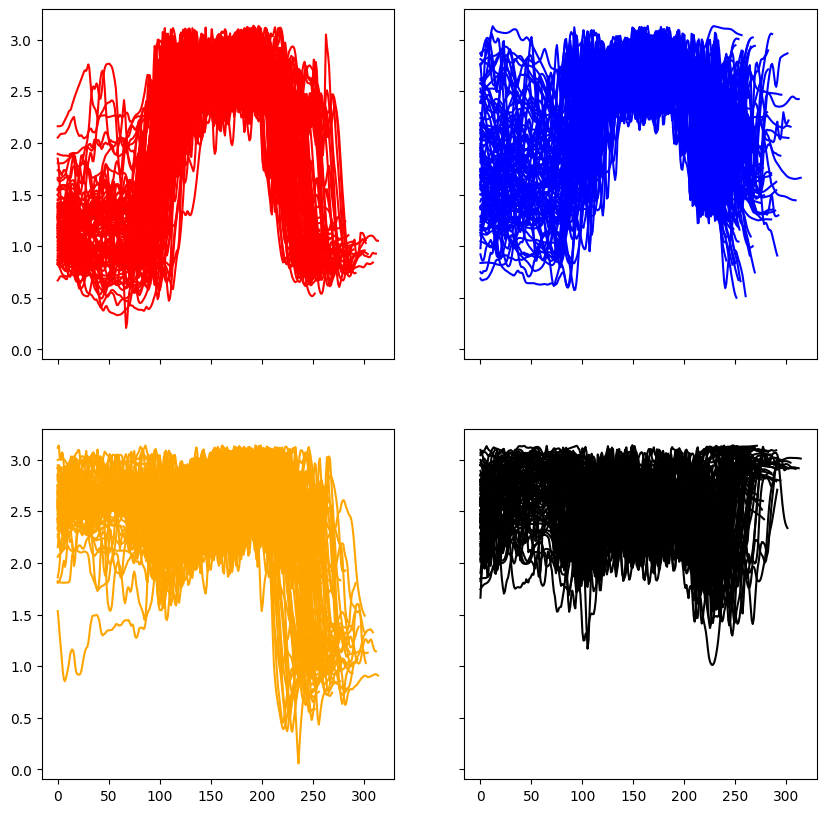

In [107]:
for session, data in poses.items():
    fig, axs = plt.subplots(
        nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 10)
    )
    angles = ml.poses.compute_angles(data, "gbyk")
    for s, e in intervals[session]:
        axs[0, 0].plot(angles[s:e, 0], color="red")
        axs[0, 1].plot(angles[s:e, 1], color="blue")
        axs[1, 0].plot(angles[s:e, 2], color="orange")
        axs[1, 1].plot(angles[s:e, 3], color="black")

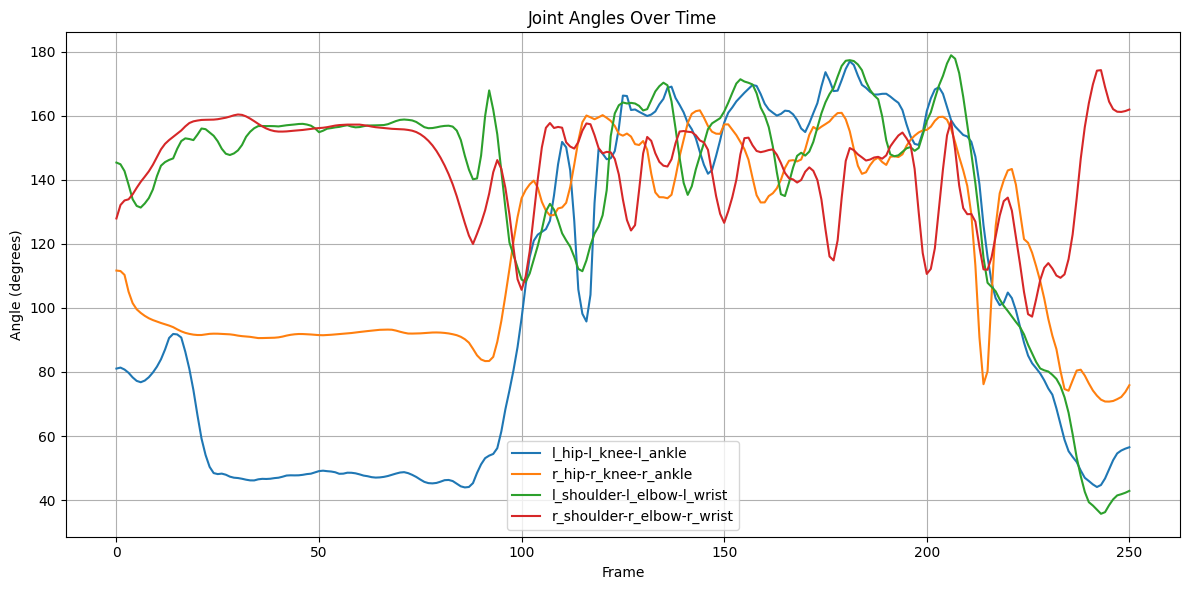

In [ ]:
for session, data in poses.items():
    fig, axs = plt.subplots(
        nrows=(angles.shape[1] - 4) // 2,
        ncols=2,
        sharex=True,
        sharey=True,
        figsize=(10, 10),
    )
    angles = ml.poses.compute_angles(data, "gbyk")
    for s, e in intervals[session]:
        for i in range(4, angles.shape[1]):
            axs[i // 2, i % 2].plot(angles[s:e, i])